In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import requests
from datetime import datetime, timedelta

In [2]:
# Load data from CSV file
repos_data = pd.read_csv('../../data/processed/repos_data.csv', encoding='latin1')
users_data = pd.read_csv('../../data/processed/users_data.csv', encoding='latin1')

In [3]:
# Check the first few rows of the data
print(repos_data.head())
print('---------------------------------------------')

# Check the number of rows and columns in the data
print(f"Number of rows: {repos_data.shape[0]}")
print(f"Number of columns: {repos_data.shape[1]}")
print('---------------------------------------------')

# Check for missing values in the data and remove them
print(repos_data.isnull().sum())

repos_data = repos_data.dropna()
print(f"New number of rows: {repos_data.shape[0]}")
print('---------------------------------------------')

# Check the data types of the columns
print(repos_data.dtypes)
print('---------------------------------------------')


          id  owner_id language created_at updated_at  stargazers_count  \
0  610791194    346687     Java   07-03-23   07-03-23                 0   
1  613695207    346687      NaN   14-03-23   14-03-23                 0   
2  250598823    404506     Java   27-03-20   27-08-20                 0   
3  251688437    404506    Shell   31-03-20   08-04-20                 0   
4   10096889    404506     Java   16-05-13   16-05-13                 0   

   forks_count  
0            0  
1            0  
2            0  
3            0  
4            0  
---------------------------------------------
Number of rows: 16736
Number of columns: 7
---------------------------------------------
id                     0
owner_id               0
language            6243
created_at             0
updated_at             0
stargazers_count       0
forks_count            0
dtype: int64
New number of rows: 10493
---------------------------------------------
id                   int64
owner_id             int6

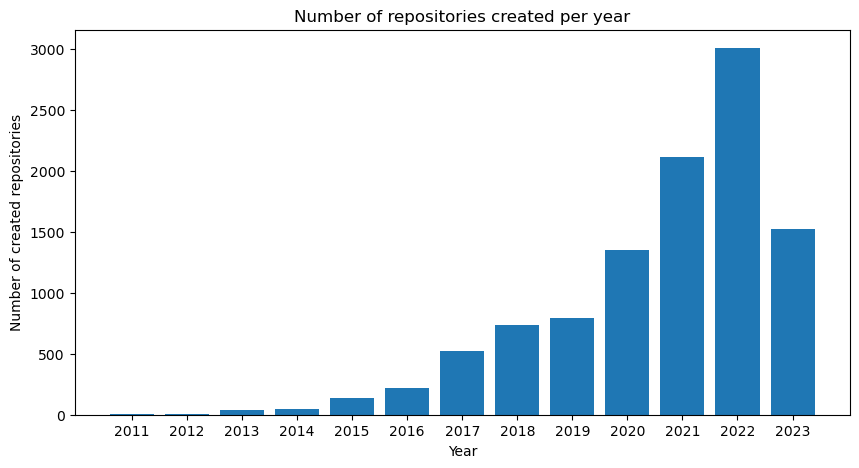

In [4]:
# Convert the "created_at" column to datetime type
repos_data['created_at'] = pd.to_datetime(repos_data['created_at'])

# Extract the years and their respective repository count
years = repos_data['created_at'].dt.year
sorted_years = Counter(years)
sorted_years = dict(sorted(sorted_years.items(), key=lambda x: x[0]))

# Display the years graph
years = [i for i, _ in sorted_years.items()]
entries = [i for _, i in sorted_years.items()]

plt.figure(figsize=(10, 5))
plt.bar(range(len(years)), entries)
plt.xticks(range(len(years)), years)
plt.xlabel('Year')
plt.ylabel('Number of created repositories')
plt.title('Number of repositories created per year')

plt.show()


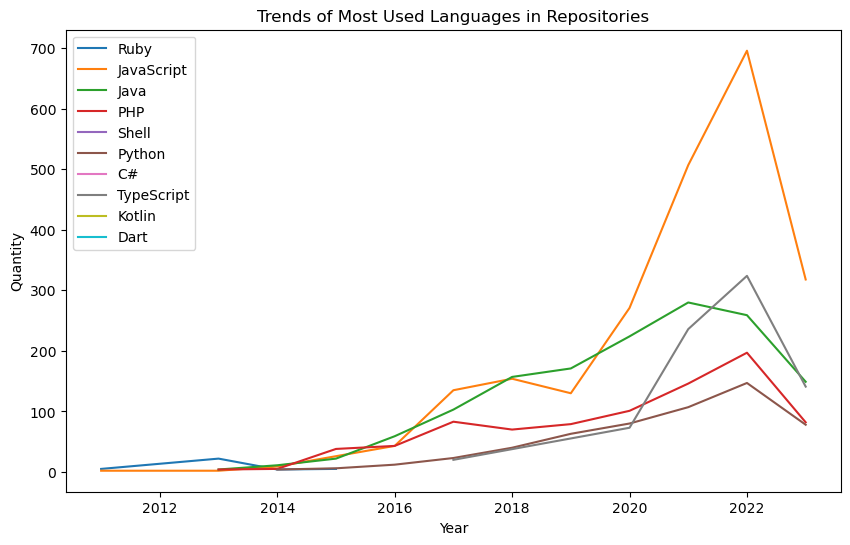

In [8]:
# Remove HTML and CSS so as not to interfere with programming languages
repos_data['years'] = repos_data['created_at'].dt.year
repos_data['language'] = repos_data['language'].drop(repos_data[repos_data['language'] == 'HTML'].index)
repos_data['language'] = repos_data['language'].drop(repos_data[repos_data['language'] == 'CSS'].index)


# Group data by year and count the occurrences of each language
grouped_data = repos_data.groupby(['years', 'language']).size().reset_index(name='count')

# Filter the top 5 most used languages for each year
top_languages = grouped_data.groupby('years').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

years = top_languages['years'].unique()
languages = top_languages['language'].unique()

# Configure colors for each language
colors = plt.cm.tab10.colors[:len(languages)]

# Plot trend chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, language in enumerate(languages):
    language_data = top_languages[top_languages['language'] == language]
    ax.plot(language_data['years'], language_data['count'], label=language, color=colors[i])

ax.set_title('Trends of Most Used Languages in Repositories')
ax.set_xlabel('Year')
ax.set_ylabel('Quantity')
ax.legend()

plt.show()


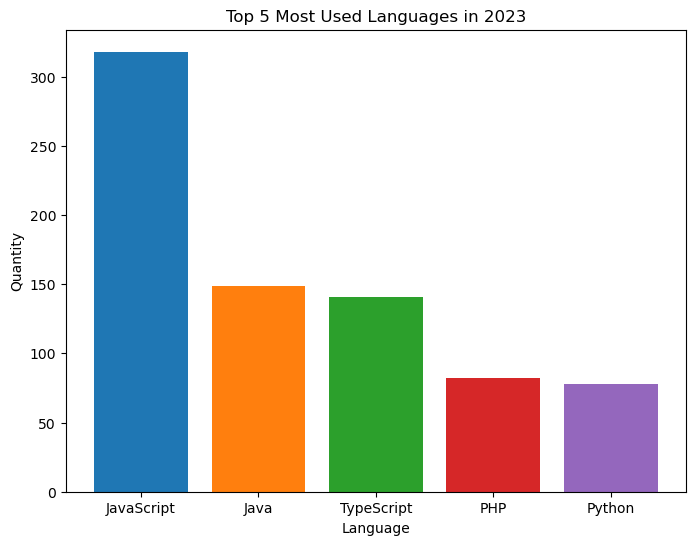

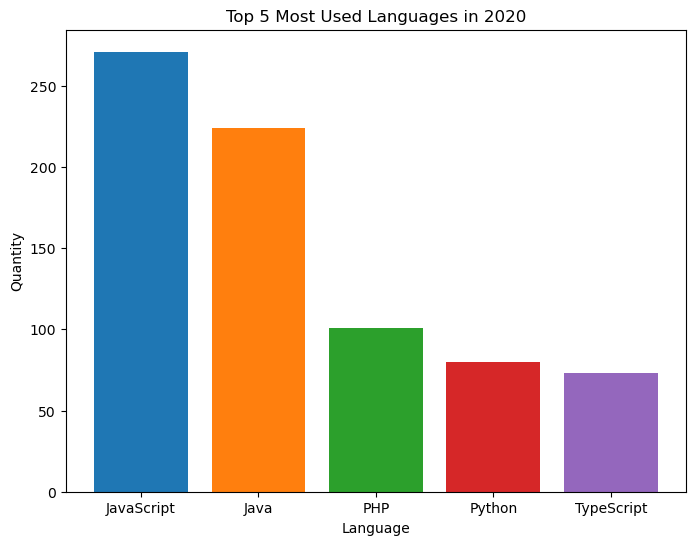

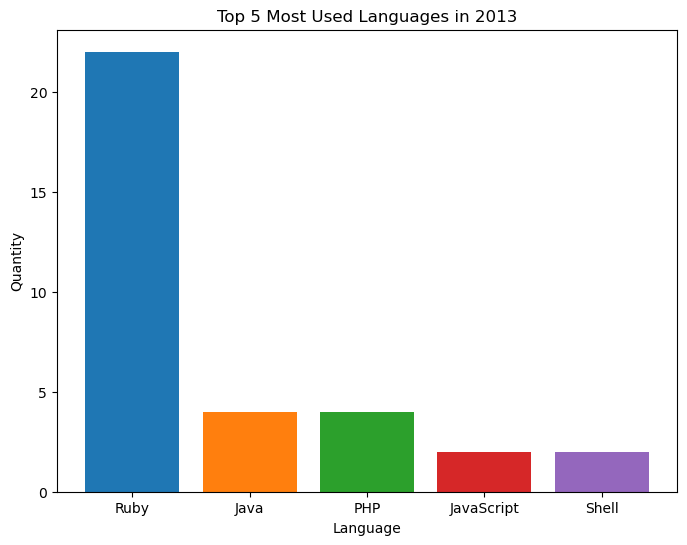

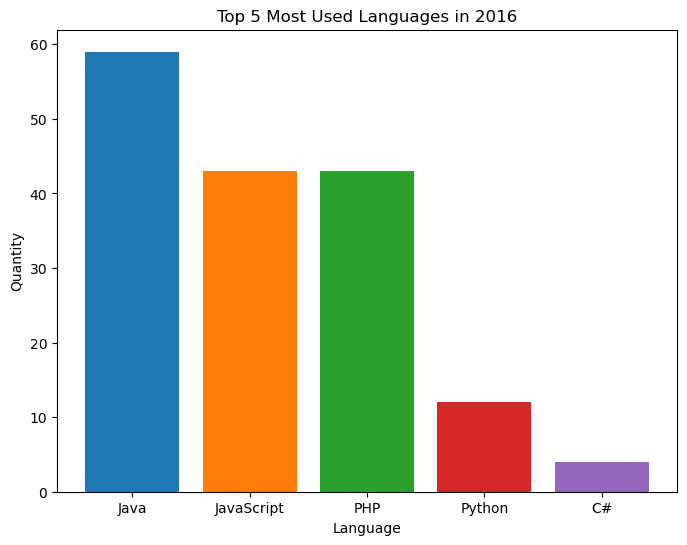

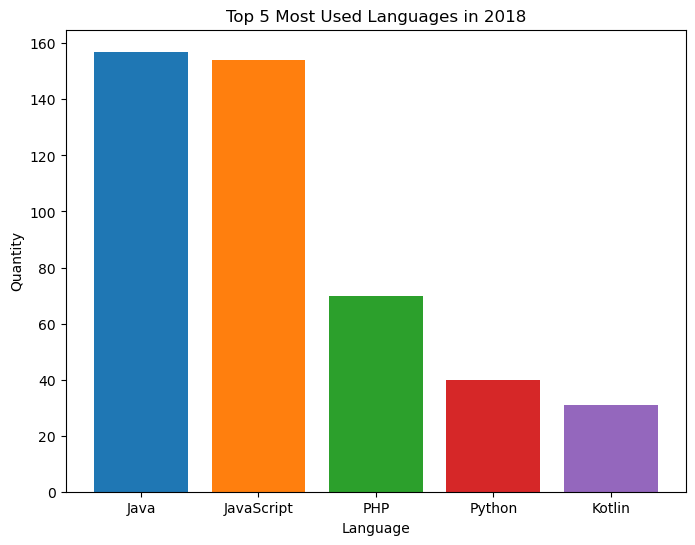

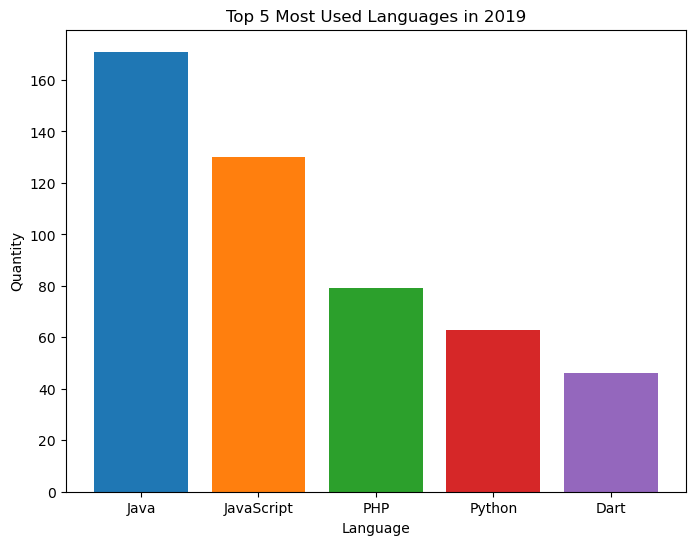

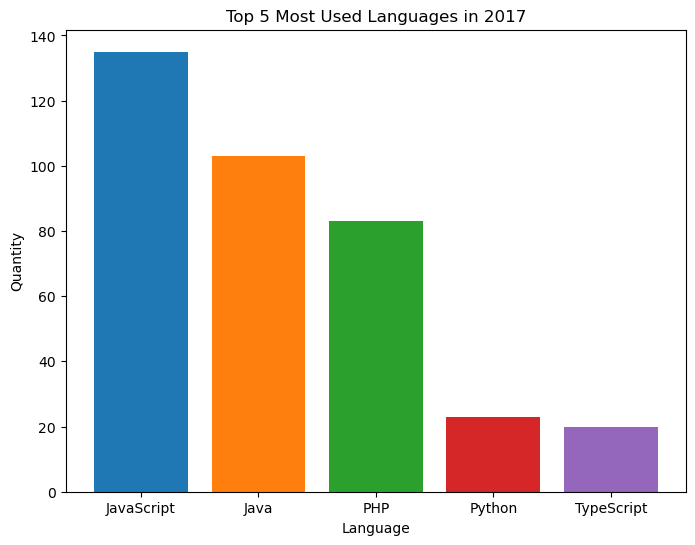

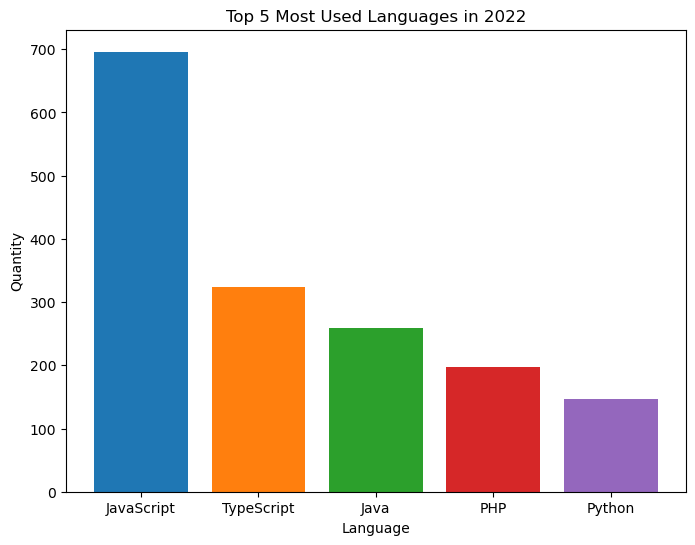

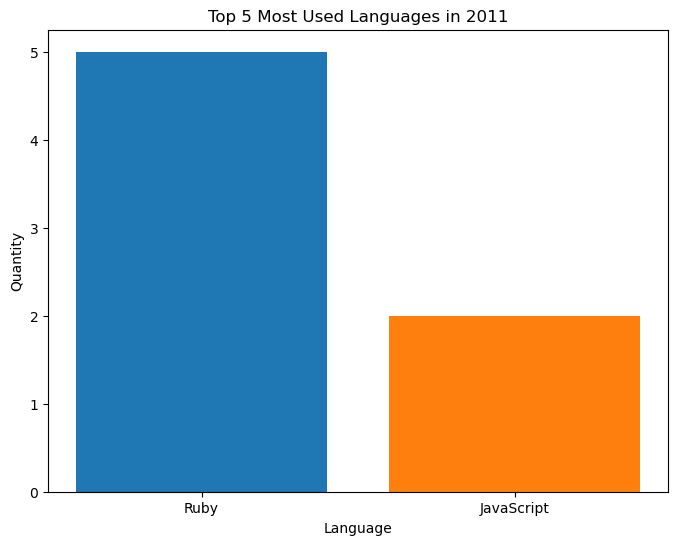

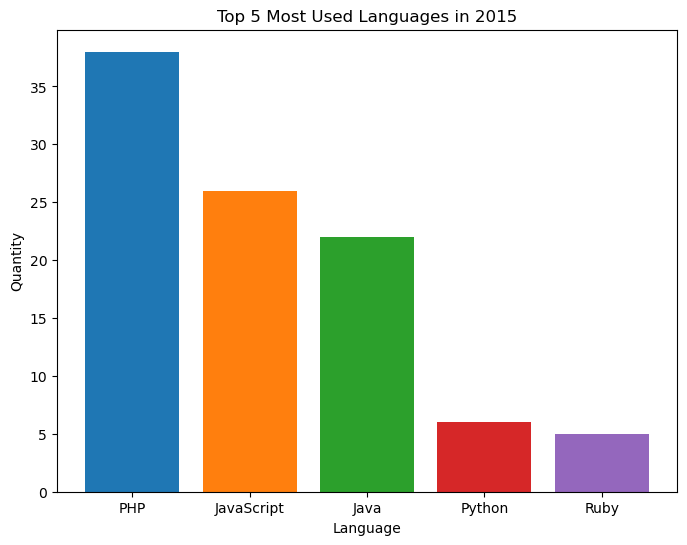

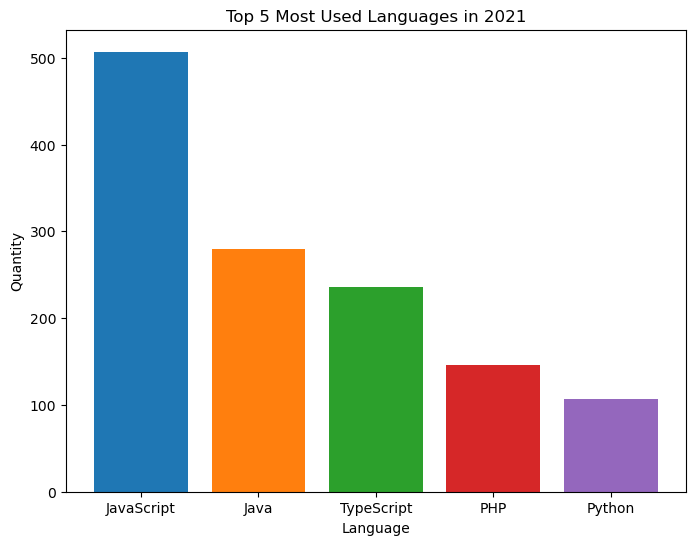

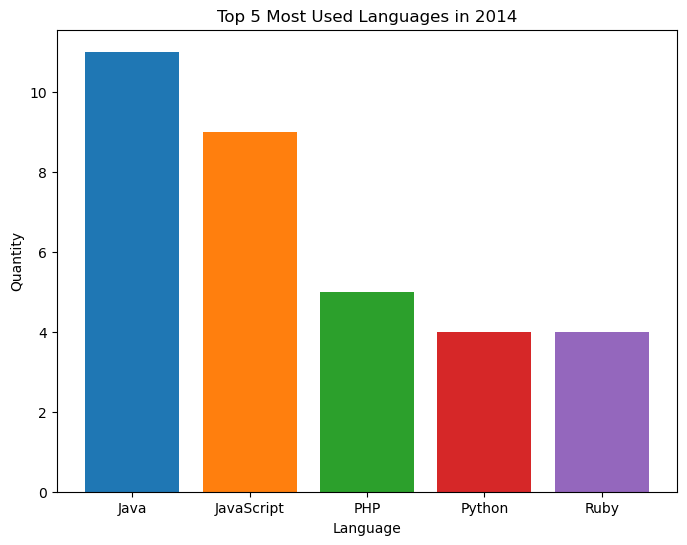

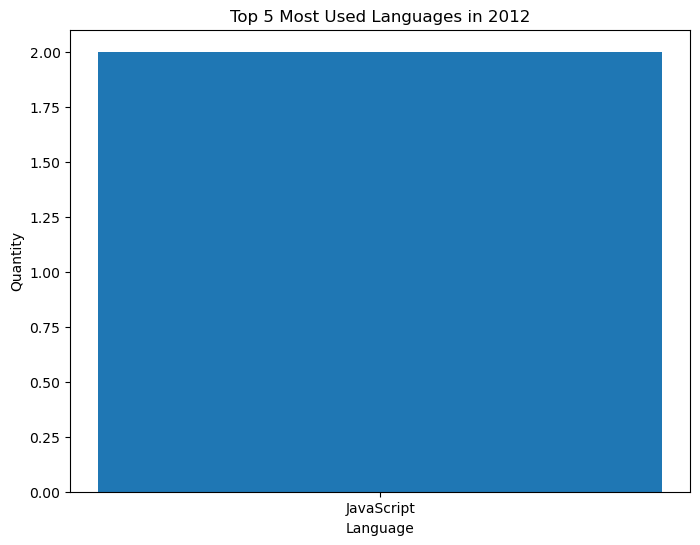

In [9]:
# Get list of years
years = repos_data['years'].unique()

# Create a bar chart for each year
for year in years:
    # Filter data for the current year
    year_data = grouped_data[grouped_data['years'] == year]
    
    # Sort languages by count
    year_data = year_data.sort_values('count', ascending=False).head(5)
    
    # Prepare data for the chart
    languages = year_data['language']
    counts = year_data['count']
    
    colors = plt.cm.tab10.colors[:len(languages)]
    
    plt.figure(figsize=(8, 6))
    plt.bar(languages, counts, color=colors)
    
    plt.title(f'Top 5 Most Used Languages in {year}')
    plt.xlabel('Language')
    plt.ylabel('Quantity')
    
    plt.show()


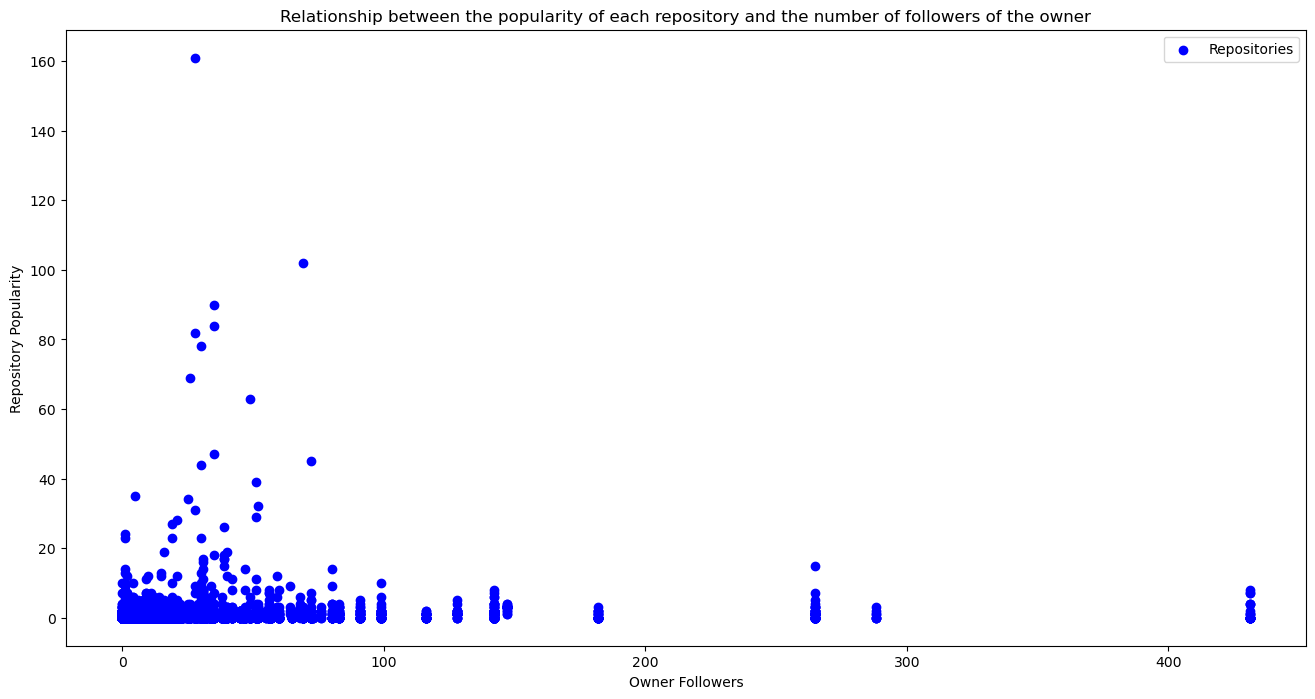

In [16]:
# Add necessary columns
repos_data['popularity'] = repos_data['stargazers_count'] + repos_data['forks_count']

united_data = repos_data.sort_values(by=['popularity'], ascending=False)

followers_dict = dict(zip(users_data['id'], users_data['followers']))

followers = [followers_dict[i] for i in united_data['owner_id']]
stars = united_data['popularity'].values.tolist()

users = united_data['owner_id'].values.tolist()
lang = united_data['language'].values.tolist()

plt.figure(figsize=(16, 8))

# Create scatter plot
plt.scatter(followers, stars, marker='o', c='blue', label='Repositories')
plt.xlabel('Owner Followers')
plt.ylabel('Repository Popularity')
plt.title('Relationship between the popularity of each repository and the number of followers of the owner')
plt.legend()

plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_137508\3465661958.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  repos_data = repos_data.groupby('owner_id').sum()


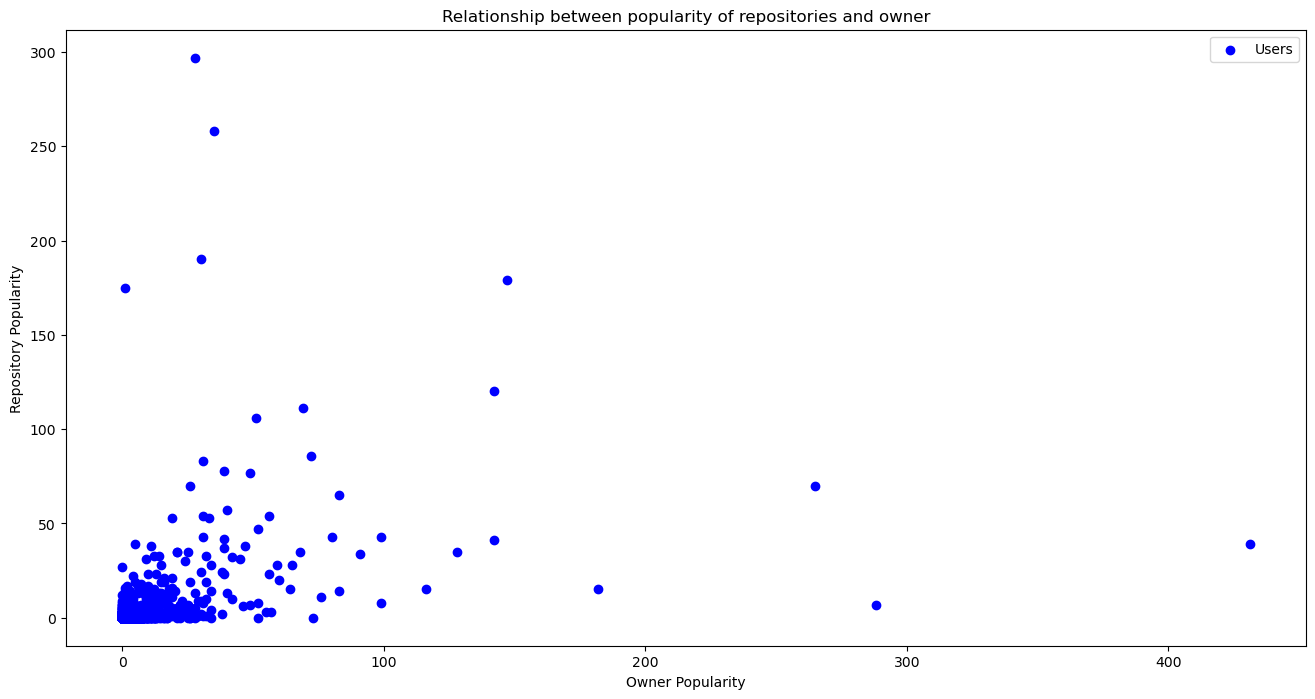

In [17]:
repos_data = repos_data.groupby('owner_id').sum()

# Add necessary columns
repos_data['popularity'] = repos_data['stargazers_count'] + repos_data['forks_count']

merged_data = repos_data.sort_values(by=['popularity'], ascending=False)

merged_data['owner_id'] = merged_data.index.tolist()

followers_dict = dict(zip(users_data['id'], users_data['followers']))

followers = [followers_dict[i] for i in merged_data['owner_id']]
stars = merged_data['popularity'].values.tolist()

users = merged_data['owner_id'].values.tolist()

plt.figure(figsize=(16, 8))

# Create scatter plot
plt.scatter(followers, stars, marker='o', c='blue', label='Users')
plt.xlabel('Owner Popularity')
plt.ylabel('Repository Popularity')
plt.title('Relationship between popularity of repositories and owner')
plt.legend()

plt.show()


In [14]:
# Reload data from CSV file
repos_data = pd.read_csv('../../data/processed/repos_data.csv', encoding='latin1')
repos_data = repos_data.dropna()

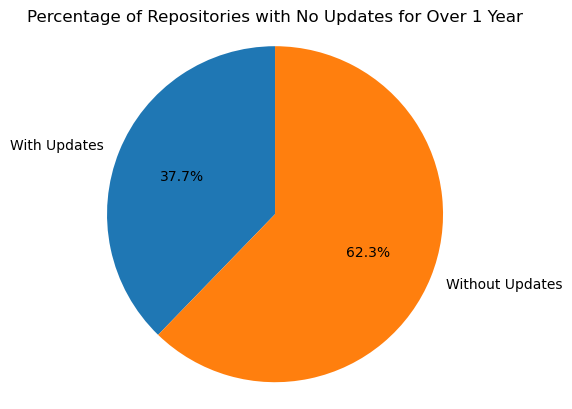

In [15]:
# Convert date columns to datetime type
repos_data['created_at'] = pd.to_datetime(repos_data['created_at'])
repos_data['updated_at'] = pd.to_datetime(repos_data['updated_at'])

# Filter repositories with at least 1 year of existence
current_date = datetime.now()
one_year_ago = current_date - timedelta(days=365)

# Calculate the percentage of repositories without updates
percentage_without_updates = (repos_data[repos_data['updated_at'] <= one_year_ago].shape[0] / repos_data.shape[0]) * 100

# Calculate the percentage of repositories with updates
percentage_with_updates = 100 - percentage_without_updates

# Create a pie chart
labels = ['With Updates', 'Without Updates']
values = [percentage_with_updates, percentage_without_updates]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Repositories with No Updates for Over 1 Year')

plt.show()
